In [28]:
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.base import clone
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import matplotlib.pyplot as plt


from RandomForest import *
from sklearn.ensemble import RandomForestClassifier


In [2]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame = False)

In [3]:
train_samples = 25000
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size = train_samples, test_size = 3000)

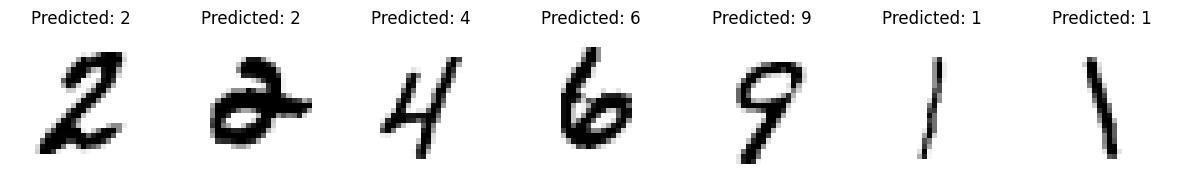

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=len(train_y[:7]), figsize = (15, 5))
for ax, image, label in zip(axes, train_x[:7], train_y[:7]):
    ax.set_axis_off()
    ax.imshow(image.reshape((28, 28)), cmap = plt.cm.gray_r)
    ax.set_title("Predicted: %s" % str(label))


In [5]:
KNN_classifiers = []
for i in range(10):
    KNN_classifiers.append(KNeighborsClassifier(i + 2))

In [32]:
def cross_val_score_mod(classifier, X, y, folds, shuffle = False):
    kf = KFold(n_splits = folds, shuffle = shuffle)
    trained_classifier = []
    accuracy_list = []
    for train_index, test_index in kf.split(X):
        X_train_kfold, X_test_kfold = X[train_index], X[test_index]
        y_train_kfold, y_test_kfold = y[train_index], y[test_index]
        classifier_fold = clone(classifier)
        classifier_fold.fit(X_train_kfold, y_train_kfold)
        prediction = classifier_fold.predict(X_test_kfold)
        accuracy = accuracy_score(y_test_kfold, prediction)
        trained_classifier.append(classifier_fold)
        accuracy_list.append(accuracy)
    return trained_classifier, accuracy_list

In [33]:
def check_classifier(classifier, X_train, y_train, X_val, y_val):
    trained_classifier, accuracy_list = cross_val_score_mod(classifier, X_train, y_train, 5)
    best_classifier = trained_classifier[np.argmax(accuracy_list)]
    accuracy = 0.0
    for i in range(len(accuracy_list)):
        accuracy += accuracy_score(y_val, trained_classifier[i].predict(X_val))
    print(accuracy_list)
    print("Accuracy %.4f" %  (accuracy / len(accuracy_list)))

    return best_classifier

In [34]:
def plot_confusion_matrix(predicted, y):
    confusion_matr = confusion_matrix(y, predicted)
    print(confusion_matr)

In [35]:
def show_predict_and_real(X, y):
    fig, axes = plt.subplots(nrows=1, ncols=len(y), figsize = (15, 5))
    for ax, image, label in zip(axes, X, y):
        ax.set_axis_off()
        ax.imshow(image.reshape((28, 28)), cmap = plt.cm.gray_r)
        ax.set_title("Predicted: %s" % str(label))

In [36]:
def show_classifier_result(clf, X_train, y_train, X_val, y_val, show_number = True):
    best_clf = check_classifier(clf, X_train, y_train, X_val, y_val)
    Z = best_clf.predict(X_val)
    plot_confusion_matrix(y_val, Z)
    wrong_predictions = [i for i in np.arange(len(Z)) if Z[i] != y_val[i]]
    if show_number:
        show_predict_and_real(X_val[wrong_predictions][:8], Z[wrong_predictions][:8])

[0.954, 0.9494, 0.953, 0.9468, 0.9552]
Accuracy 0.9497
[[305   0   5   0   1   3   3   0   2   1]
 [  1 344   3   1   4   1   2   8   8   1]
 [  0   0 259   0   0   0   1   1   2   1]
 [  0   0   1 281   0   9   0   2  11   3]
 [  0   0   0   0 296   0   0   6   5  11]
 [  0   0   0   2   0 244   1   2   8   1]
 [  0   0   0   0   1   2 281   0   1   0]
 [  0   1   2   1   1   0   0 309   1  20]
 [  0   0   0   0   0   0   0   0 259   0]
 [  0   0   0   0   5   2   0   1   3 270]]
[0.9598, 0.959, 0.9622, 0.957, 0.9636]
Accuracy 0.9563
[[305   0   3   0   2   3   1   1   2   1]
 [  0 342   1   1   3   1   2   6   8   0]
 [  0   1 260   0   0   0   0   1   1   0]
 [  0   0   0 279   0   3   0   1   9   2]
 [  0   1   0   0 285   0   0   6   5   7]
 [  1   0   0   4   0 246   0   1   4   0]
 [  0   0   0   0   2   3 285   0   1   0]
 [  0   1   5   1   1   1   0 310   0   8]
 [  0   0   1   0   0   0   0   0 265   1]
 [  0   0   0   0  15   4   0   3   5 289]]
[0.9588, 0.9578, 0.9588, 0.9

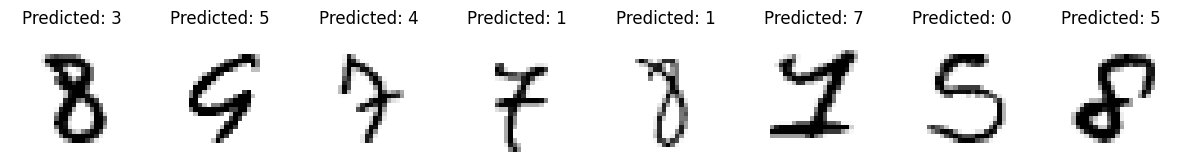

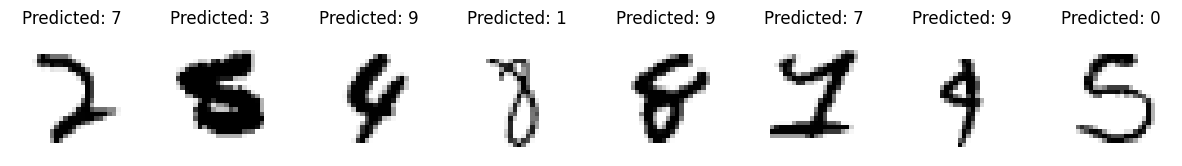

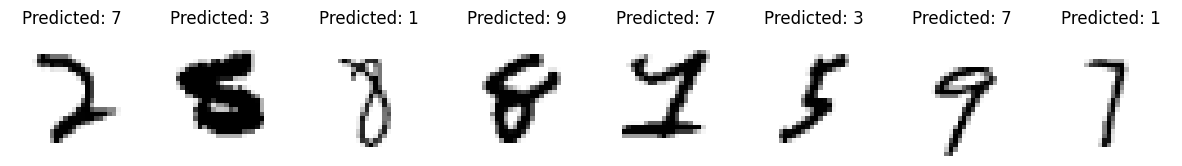

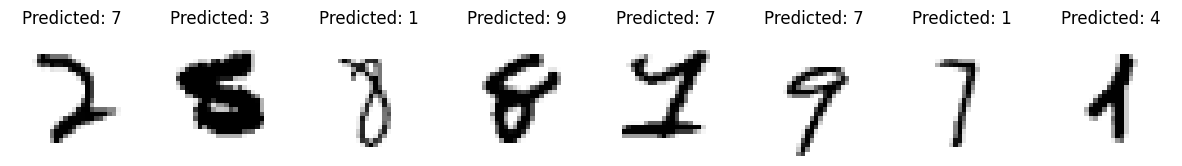

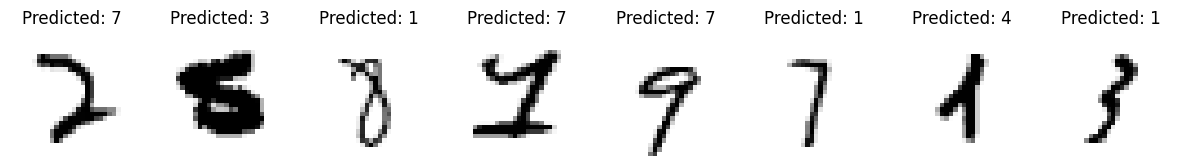

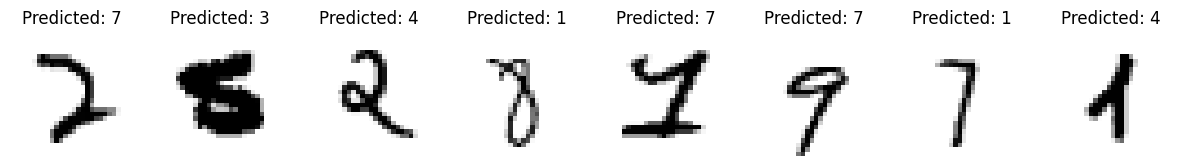

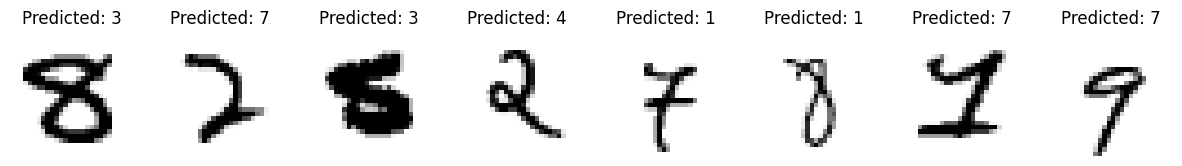

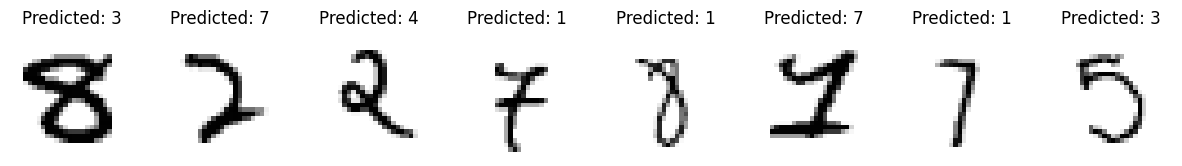

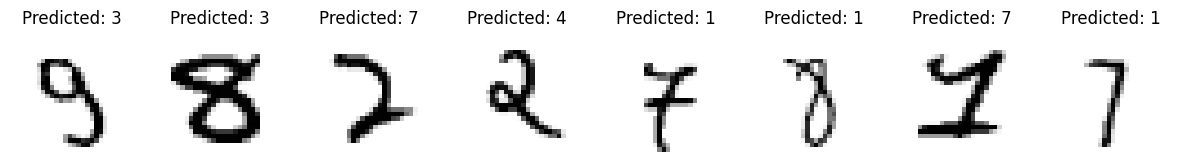

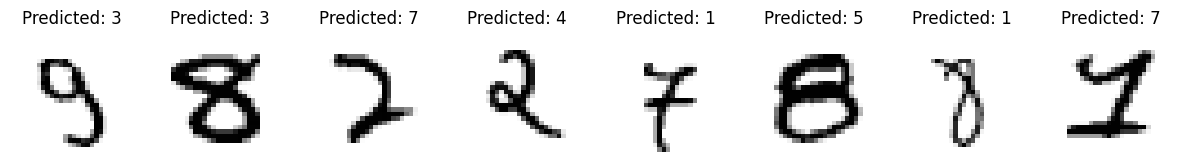

In [11]:
for i in range(len(KNN_classifiers)):
    show_classifier_result(KNN_classifiers[i], train_x, train_y, test_x, test_y)

In [12]:
DTC_classifiers = []
for i in range(10):
    DTC_classifiers.append(DecisionTreeClassifier(max_depth = i+1))

[0.1978, 0.1978, 0.203, 0.2002, 0.191]
Accuracy 0.2007
[[  0   0   0   0   0   0   0   0   0   0]
 [ 26 303  46 229  21  90  55  30 139  69]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [280  42 224  56 287 171 233 299 161 239]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
[0.3442, 0.328, 0.3432, 0.3508, 0.3308]
Accuracy 0.3415
[[242  17 174  26  11  89  98  10  86  11]
 [  4 282  35  17   9  19  32  17  85  24]
 [  0   0   0   0   0   0   0   0   0   0]
 [ 22  21  11 212  12  71  23  13  54  45]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [ 38  25  50  30 276  82 135 289  75 228]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
[0.4998, 0.4284, 0.4878, 0.

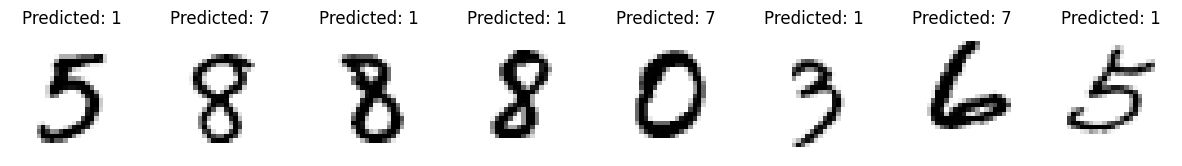

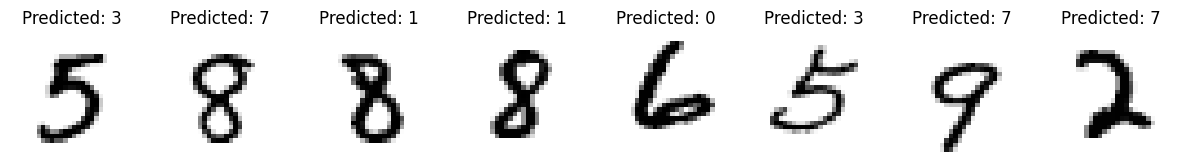

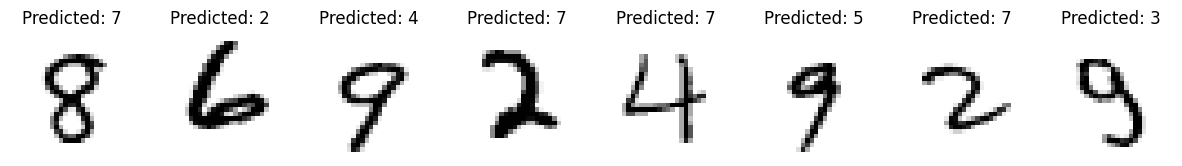

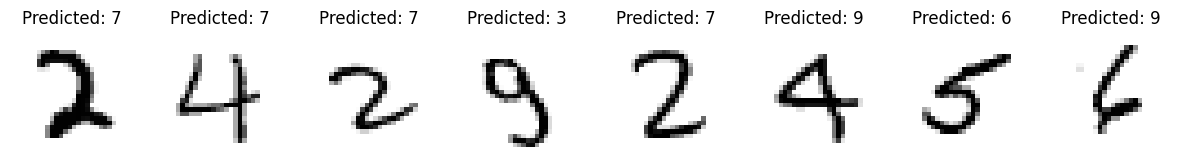

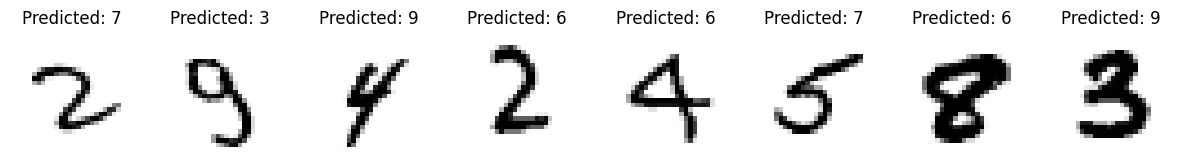

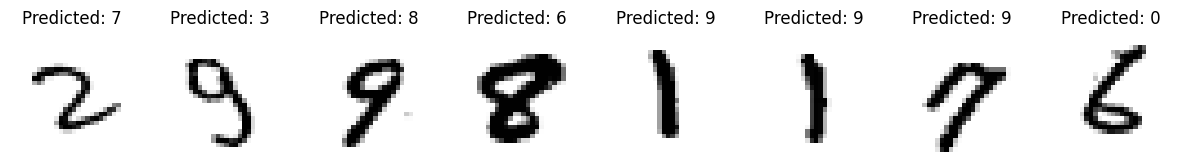

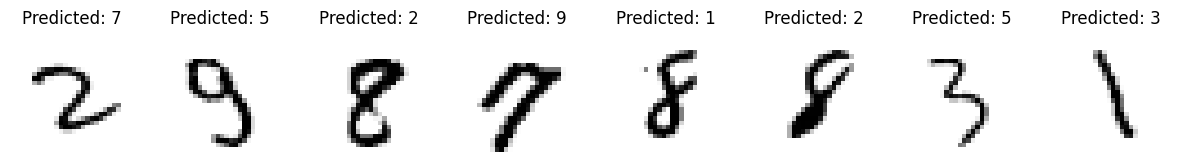

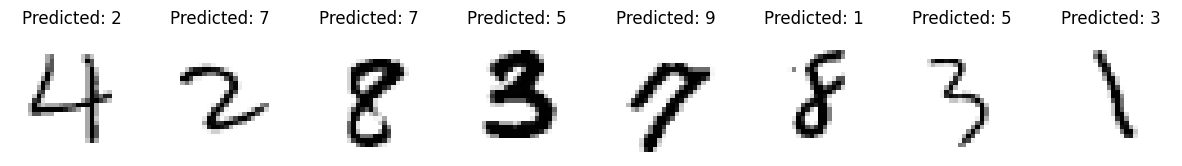

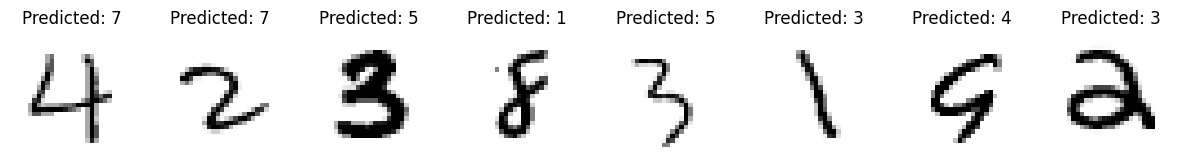

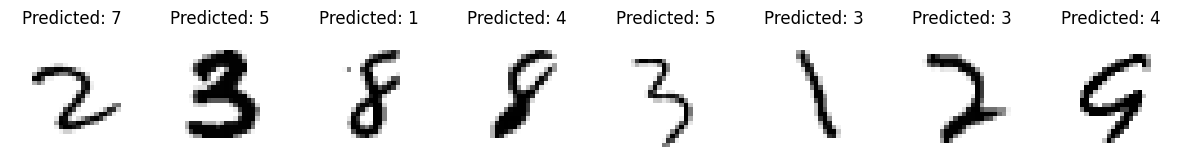

In [13]:
for i in range(len(DTC_classifiers)):
    show_classifier_result(DTC_classifiers[i], train_x, train_y, test_x, test_y)

### SVM

In [30]:
SVC_classifiers = []
SVC_kernels = {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
for sv_kernel in SVC_kernels:
    SVC_classifiers.append(SVC(kernel = sv_kernel))

In [37]:
show_classifier_result(SVC_classifiers[0], train_x, train_y, test_x, test_y)

ValueError: Precomputed matrix must be a square matrix. Input is a 20000x784 matrix.

[0.9176, 0.9136, 0.9166, 0.9126, 0.9142]
Accuracy 0.9146
[[298   0   1   2   1   5   1   1   2   3]
 [  0 338   5   1   1   1   1   3   8   0]
 [  1   3 240   5   2   4   1   3   2   0]
 [  1   0   9 263   0   9   0   0   7   2]
 [  2   0   5   0 281   6   5   4   5  13]
 [  1   1   0  10   0 218   4   1   8   4]
 [  2   0   1   1   2   4 272   1   3   0]
 [  1   1   2   2   2   3   0 310   1  16]
 [  0   2   6   1   4   7   4   1 260   6]
 [  0   0   1   0  15   4   0   5   4 264]]


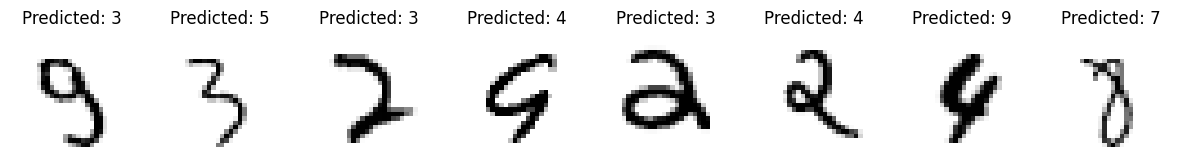

In [17]:
show_classifier_result(LogisticRegression(C = 50.0 / train_samples, penalty = "l1", solver = "saga", tol = 0.1), train_x, train_y, test_x, test_y)

$$S(R) = -\sum_{i=1}^{n} p_i \cdot \log{p_i}$$

$$Gain(A) = Info(S) - Info(S_A)$$


Gini impurity
$$G = \sum_{k=1}^{C} p_k*(1 - p_k)$$

### My Random Forest

In [26]:
my_RF = MyRandomForest(100, 1.0)
my_RF.fit(train_x, train_y)
predict_list  = my_RF.predict(test_x)
y  = test_y.astype(np.int64)
print(accuracy_score(y, predict_list))



0.954


In [27]:
sk_rforest = RandomForestClassifier(100)
sk_rforest.fit(train_x, train_y)
y_pred_skrforest = sk_rforest.predict(test_x)
print(accuracy_score(test_y, y_pred_skrforest))

0.954
